# 1. Image compression using clustering [60 points]

### <span style="color:green">Code</span>



In [12]:
from matplotlib import pyplot as plt
from PIL import Image
from collections import Counter,defaultdict
import pandas as pd
import numpy as np 
import timeit
import json
import sys

In [6]:
class Preprocessing(object):
    def __init__(self,original_arr,modified_arr):
        self.original_arr=original_arr
        self.modified_arr=modified_arr
        
    @classmethod
    def readMessage(cls,path):
        img=Image.open(path)
        img_arr=np.array(img,dtype='int32')
        r,c,I=img_arr.shape
        img_reshaped=np.reshape(img_arr,(r*c,I),order="C")
        return cls(img_arr,img_reshaped)
    
    def displayOriginal(self,h_size=10,v_size=10):
        plt.figure(figsize=(h_size,v_size))
        plt.imshow(self.original_arr)

In [7]:
class KMean():
    def __init__(self,X,k):
        self.X=X
        self.k=k
        self.rowNumber=self.X.shape[0]
        self.colNumber=self.X.shape[1]
        self.labels=None
        self.centers=None
    
    def assignClusterLabel(self,distMatrix):
        return np.argmin(distMatrix,axis=1)
    
    def initialCenters(self):
        samples=np.random.choice(self.rowNumber,size=self.k,replace=False)
        return self.X[samples,:]
    
    
    def computeDist(self,centers,method='Euclidean'):
        distMatrix=np.empty((self.rowNumber,self.k))
        for r in range(self.rowNumber):
            if method=='Euclidean':
                d=np.linalg.norm(self.X[r,:]-centers,ord=2,axis=1)
            elif method=='Manhattan':
                d=np.linalg.norm(self.X[r,:]-centers,ord=1,axis=1)
            distMatrix[r,:]=d**2
        return distMatrix

    
    def updateCenters(self,labels,method_update='mean'):
        assert type(labels)==np.ndarray
        assert self.rowNumber==labels.shape[0]
        updatedCenters=np.empty((self.k,self.colNumber))
        
        for i in range(self.k):
            if method_update=='mean':
                updatedCenters[i,:self.colNumber]=np.mean(self.X[labels==i,:],axis=0)
            elif method_update=='median':
                updatedCenters[i,:self.colNumber]=np.median(self.X[labels==i,:],axis=0)
                
        return updatedCenters
    
    def isConvergence(self,originalCenters,updatedCenters):
        return set([tuple(x) for x in originalCenters])==set([tuple(y) for y in updatedCenters])
    
    
    def predict(self,startCenter=None,method='Euclidean',method_update='mean',maxIter=1000,verbose=True):
        if startCenter is None:
            centers=self.initialCenters()
        else:
            centers=startCenter
        convergence=False
        labels=np.zeros(self.rowNumber)
        iteration=1
        startTime=timeit.default_timer()
        while (not convergence) and (iteration<=maxIter):
            oldCenters=centers
            distMatrix=self.computeDist(centers,method=method)
            labels=self.assignClusterLabel(distMatrix)
            centers=self.updateCenters(labels,method_update=method_update)
            convergence=self.isConvergence(oldCenters,centers)
            iteration+=1
        terminateTime=timeit.default_timer()
        timediff=round(terminateTime-startTime)
        self.labels=labels
        self.centers=centers
        if verbose==True:
            print("Kmean for {0} cluster centers has converged within {1} iterations and taken {2} seconds to fjnish".\
                  format(self.k,iteration,timediff))
        else:
            return self.labels
        
        
        
def convertImage(centers,labels,originalShapes):
    img_center=np.array([centers[label] for label in labels])
    img_disp=np.reshape(img_center,originalShapes)
    return img_disp

### <span style="color:green">Load all the data</span>



In [16]:
import os
directory = os.getcwd()

football_path=directory+'\\'+'football.bmp'
shapes=Preprocessing.readMessage(football_path).modified_arr.shape
data=Preprocessing.readMessage(football_path).modified_arr
originalData=Preprocessing.readMessage(football_path).original_arr

In [17]:
gt=directory+'\\'+'GeorgiaTech.bmp'
shapes=Preprocessing.readMessage(gt).modified_arr.shape
data_gt=Preprocessing.readMessage(gt).modified_arr
originalData_gt=Preprocessing.readMessage(gt).original_arr

In [18]:
blackpink=directory+'\\'+"black_pink(320x180).jpg"
shapes=Preprocessing.readMessage(blackpink).modified_arr.shape
data_bp=Preprocessing.readMessage(blackpink).modified_arr
originalData_bp=Preprocessing.readMessage(blackpink).original_arr

### 1. (20 points) 

Use k-means with squared-`2 norm as a metric, for GeorgiaTech.bmp and football.bmp
and also choose a third picture of your own to work on. We recommend size of 320 × 240 or smaller.
Run your k-means implementation with these pictures, with several different k = 2, 4, 8, 16. How long
does it take to converge for each k (report the number of iterations, as well as actual running time)?
Please write in your report, and also include the resulted compressed pictures for each k.


## <span style="color:green">Answer </span>
### <span style="color:green">A) Results </span>

In [302]:
#pure random football
kmean_results_ft=dict()
pure_random=np.random.randint(0,256,3)
for c in [2,4,8,16]:
    kmean=KMean(data,c)
    kmean.predict()
    cluster='{} clusters'.format(c)
    kmean_results_ft[cluster]=(kmean.centers,kmean.labels)



Kmean for 2 cluster centers has converged within 16 iterations and taken 87 seconds to fjnish
Kmean for 4 cluster centers has converged within 44 iterations and taken 231 seconds to fjnish
Kmean for 8 cluster centers has converged within 85 iterations and taken 448 seconds to fjnish
Kmean for 16 cluster centers has converged within 101  iterations and taken 562  seconds to fjnish





In [284]:
#pure random gt
kmean_results_gt=dict()
pure_random=np.random.randint(0,256,3)
for c in [2,4,8,16]:
    kmean=KMean(data_gt,c)
    kmean.predict()
    cluster='{} clusters'.format(c)
    kmean_results_gt[cluster]=(kmean.centers,kmean.labels)
    



Kmean for 2 cluster centers has converged within 13 iterations and taken 40 seconds to fjnish
Kmean for 4 cluster centers has converged within 60 iterations and taken 198 seconds to fjnish
Kmean for 8 cluster centers has converged within 125 iterations and taken 412 seconds to fjnish
Kmean for 16 cluster centers has converged within 77 iterations and taken 257 seconds to fjnish



In [283]:
#pure_random_blackpink
kmean_results_bp=dict()
for c in [2,4,8,16]:
    kmean=KMean(data_bp,c)
    kmean.predict()
    cluster='{} clusters'.format(c)
    kmean_results_bp[cluster]=(kmean.centers,kmean.labels)



Kmean for 2 cluster centers has converged within 9 iterations and taken 9 seconds to fjnish
Kmean for 4 cluster centers has converged within 34 iterations and taken 39 seconds to fjnish
Kmean for 8 cluster centers has converged within 40 iterations and taken 47 seconds to fjnish
Kmean for 16 cluster centers has converged within 158 iterations and taken 207 seconds to fjnish



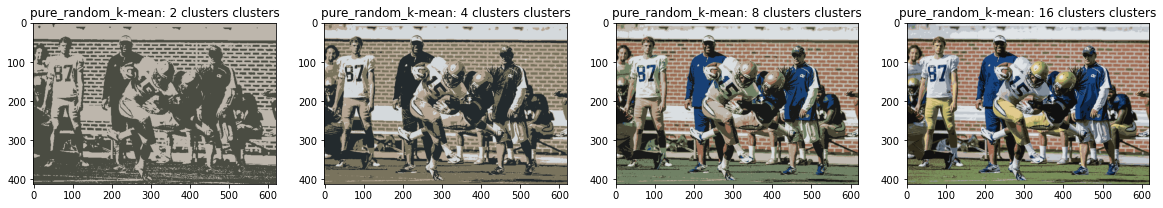

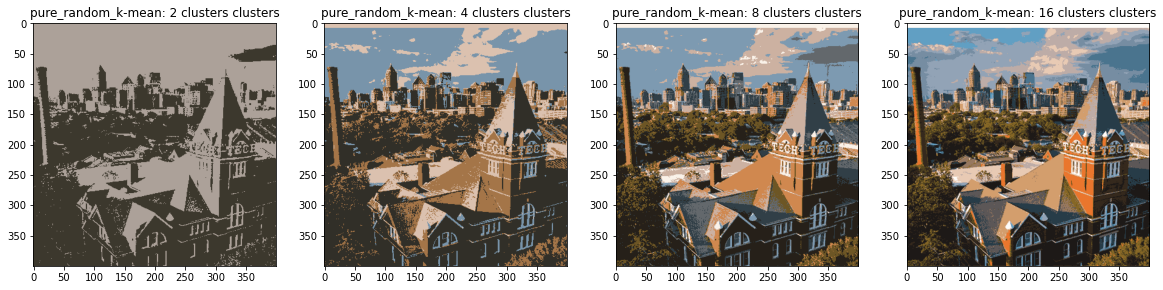

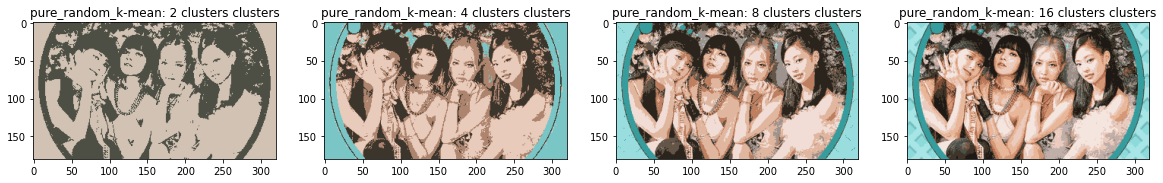

In [27]:

fig,axes=plt.subplots(1,4,figsize=(20,10),sharex=True)
for col,cluster in zip(range(4),kmean_results_ft):
    values=kmean_results_ft[cluster]
    img_disp=convertImage(values[0],values[1],originalData.shape)
    axes[col].imshow(img_disp.astype("uint8"))
    axes[col].set_title(title+': {} clusters'.format(cluster))
print()
fig,axes=plt.subplots(1,4,figsize=(20,10),sharex=True)
for col,cluster in zip(range(4),kmean_results_gt):
    values=kmean_results_gt[cluster]
    img_disp=convertImage(values[0],values[1],originalData_gt.shape)
    axes[col].imshow(img_disp.astype("uint8"))
    axes[col].set_title(title+': {} clusters'.format(cluster))
print()
fig,axes=plt.subplots(1,4,figsize=(20,10),sharex=True)
for col,cluster in zip(range(4),kmean_results_bp):
    values=kmean_results_bp[cluster]
    img_disp=convertImage(values[0],values[1],originalData_bp.shape)
    axes[col].imshow(img_disp.astype("uint8"))
    axes[col].set_title(title+': {} clusters'.format(cluster))
print()




### <span style="color:green">B) Analysis</span>




As instructed in the homework sheet, I have experimented on different pictures and selected the best performance of all. From many trials, there are a couple of things we should pay attention to. 

First, As you can see with an increase in the value of K, the image becomes clearer because the K-means algorithm can classify more classes/cluster of colors. Too small k distorts the representation of the picture . On the other hand, the high k makes the compression look identical to that of the given image but the cost and time taken to finish the task are 'exponentially increasing. Therefore, crucial and key is to find the optimal point to balance between the quality of image compression and time computation. For all the three pictures, our best choice should go to k=8.

Second,the computation cost is considerably high in computing the distance between the centroid and each point. The cost of finding the distance difference is getting higher if the size of the data increases.   

Third, considering iterative nature and the random initialization of centroids at the begining of the algorithm, performance would vary depending on different initializaitons. Therefore, it is necessary to run algorithms with different initializations of centroids and pick the best one. 



### 2. (20 points) 

Run your k-means implementation (with squared-`2 norm) with different initialization
centroids. Please test two initialization strategies, compare the results (output image, running time,
iterations) and report: (i) random initialization. Please try multiple time and report the best one (in
terms of the image quality). (ii) poor initialization. Please design your own strategy, explain why it
qualifies as a poor initialization, try multiple times, and report the results.
How does this it affect your final result? (We usually randomize initial location of centroids in general.)
Please also explain in the report how you initialize the centroid.



### <span style="color:green"> (Answer)</span>

### <span style="color:green"> A) Stargegy </span>


 In this chapter, we will look into two contrasting strategies to take initial centroids, "K-mean ++ Initialization" and "Poor Initial Centroids". 
 
 First, we may consider choosing k-number centroids from the given data set and used as the initial centroids. Of course, the selection process is random. That is exactly what we have gone through in the first section of part 1. How about moving one more step to find the way to increase the performance of our algorithm by taking the better selection of centroids at the initial stage?  We use what is so-called 'K-mean ++'. Loosely speaking, instead of randomly picking all the centroids, we take the one centroid at random and compute the distance of each data point from the cluster centers already chosen.<b>The next centroid will be or more likely the one who is located furthest from the rest group. </b>

 The second approach is taking the exact opposite to the one we have taken in the previous. That is, __<b>make the centroids located as close as possible if K is greater than 1.</b>__ We need to select the random index number among the numbers of rows of our given dataset and choose as the initial centroid the values on the corresponding index. If we seek  more than one cluster, then the next centroid increases by 1 in all dimensions. For example, assuming that we want to group our data into three clusters, we first choose the centroid at random and increase the values by 1 for the second and 2 for the third centroid. 
 





In [23]:
class KMean_extra(KMean):
    @staticmethod
    def distance(data,centers):
        dist=np.sum((data[:,None,:]-np.array(centers))**2,axis=2)
        return dist
    @staticmethod
    def negative_check(pdf):
        check=all([True if p>0 else False for p in pdf])
        if check:
            return pdf
        else:
            pdf_=[np.exp(p) for p in pdf]
            pdf_m=pdf_/sum(pdf_)
            return pdf_m
        
    def kmean_plus_plus(self,pdf_on=False):
        centers=[]
        if self.X.__class__==np.ndarray:
            self.X=np.array(self.X)

        #take an initial sample
        initial_index=np.random.choice(self.X.shape[0])
        centers.append(self.X[initial_index,:])
        
        for index in range(self.k-1):
            dist=self.distance(self.X,centers)
            if index==0:
                pdf=self.negative_check(dist/np.sum(dist))
                new_centroid=self.X[np.random.choice(self.X.shape[0],p=pdf.flatten()),:]
            else:
                dist_min=np.min(dist,axis=1)
                if pdf_on:
                    pdf=self.negative_check(dist_min/np.sum(dist_min))
                    new_centroid=self.X[np.random.choice(self.X.shape[0],replace=False,p=pdf)]
                else:
                    new_centroid=self.X[np.argmax(dist_min,axis=0),:]
            centers.append(new_centroid)
        return np.array(centers)
    

In [ ]:
kmean_results_gt_man=dict()
for c in [2,4,8,16]:
    kmean=KMean_extra(data_gt,c)
    initial_kp=kmean.kmean_plus_plus()
    kmean.predict(startCenter=initial_kp,method='Manhattan',method_update='median')
    cluster='{} clusters'.format(c)
    kmean_results_gt_man[cluster]=(kmean.centers,kmean.labels)

## <span style="color:green"> B) Results </span>


### <span style="color:blue"> Random Initializatiton(KMean++) and Results</span>

In [55]:
kmean_results_bp=dict()
for c in [2,4,8,16]:
    kmean=KMean_extra(data_bp,c)
    initial_kp=kmean.kmean_plus_plus()
    kmean.predict(startCenter=initial_kp)
    cluster='{} clusters'.format(c)
    kmean_results_bp[cluster]=(kmean.centers,kmean.labels)




Kmean for 2 cluster centers has converged within 8 iterations and taken 9 seconds to fjnish
Kmean for 4 cluster centers has converged within 23 iterations and taken 27 seconds to fjnish
Kmean for 8 cluster centers has converged within 28 iterations and taken 33 seconds to fjnish
Kmean for 16 cluster centers has converged within 125 iterations and taken 160 seconds to fjnish



## <span style="color:blue">Poor Initializatiton and Results</span>

In [117]:
kmean_results_bp_poor=dict()
fixed_number=np.random.choice(range(data_bp.shape[0]))
fixed_value=data_bp[fixed_number,:]
for c in [2,4,8,16]:
    kmean=KMean_extra(data_bp,c)
    initial_kp=[]
    #Increase by 1 as we iterate over the number of k
    for index,value in enumerate(range(c)):
        initial_kp.append(fixed_value+index)
    kmean.predict(startCenter=np.array(initial_kp),maxIter=300)
    cluster='{} clusters'.format(c)
    kmean_results_bp_poor[cluster]=(kmean.centers,kmean.labels)




Kmean for 2 cluster centers has converged within 12 iterations and taken 13 seconds to fjnish
Kmean for 4 cluster centers has converged within 45 iterations and taken 54 seconds to fjnish
Kmean for 8 cluster centers has converged within 63 iterations and taken 76 seconds to fjnish
Kmean for 16 cluster centers has converged within 219 iterations and taken 308 seconds to fjnish



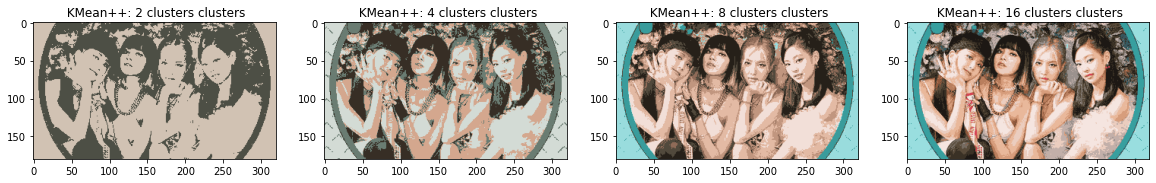

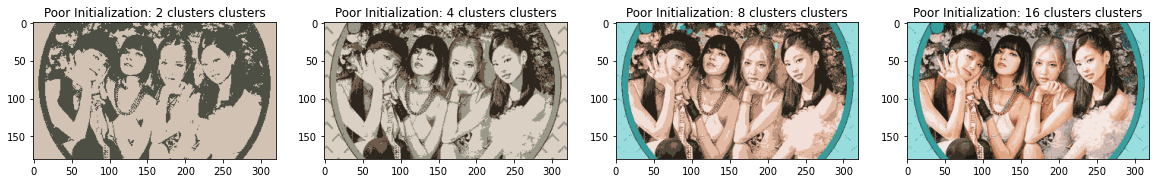

In [116]:
title=' KMean++'
fig,axes=plt.subplots(1,4,figsize=(20,10),sharex=True)
for col,cluster in zip(range(4),kmean_results_bp):
    values=kmean_results_bp[cluster]
    img_disp=convertImage(values[0],values[1],originalData_bp.shape)
    axes[col].imshow(img_disp.astype("uint8"))
    axes[col].set_title(title+': {} clusters'.format(cluster))

title='Poor Initialization'
fig,axes=plt.subplots(1,4,figsize=(20,10),sharex=True)
for col,cluster in zip(range(4),kmean_results_bp):
    values=kmean_results_bp_poor[cluster]
    img_disp=convertImage(values[0],values[1],originalData_bp.shape)
    axes[col].imshow(img_disp.astype("uint8"))
    axes[col].set_title(title+': {} clusters'.format(cluster))

### <span style="color:green"> C) Analysis </span>

 Overall, the image has become clear as we increase the number of clusters. But pay attention to the quality of the image when k is 4. Our first approach has outperformed in classifying the clusters of colors in terms of quality. Although the results from these two look identical to each other over k=4, still Kmean++ has the upper hand considering the number of iterations and its accompanying time cost. 

From this simple task, we have learned an imporant lesson; <b>_The choice of random initialization of centroids at the start of algorithm greatly influence the image processing_<b>

### 3. (20 points) 

Now try your k-means with the Manhattan distance (or `1 distance) and repeat the same
steps in Part (1). Please note that the assignment of data point should be based on the Manhattan
distance, and the cluster centroid (by minimizing the sum of deviance – as a result o fusing the
Manhattan distance) will be taken as the “median” of each cluster. Comment on the difference of
image compression results using the two methods


## <span style="color:green">Answer </span>
### <span style="color:green">A) Results </span>

In [75]:
kmedian_results_ft_man=dict()
for c in [2,4,8,16]:
    kmedian=KMean_extra(data,c)
    initial_kp=kmedian.kmean_plus_plus()
    kmedian.predict(startCenter=initial_kp,method='Manhattan',method_update='median')
    cluster='{} clusters'.format(c)
    kmedian_results_ft_man[cluster]=(kmedian.centers,kmedian.labels)


Kmean for 2 cluster centers has converged within 9 iterations and taken 39 seconds to fjnish
Kmean for 4 cluster centers has converged within 43 iterations and taken 206 seconds to fjnis
Kmean for 8 cluster centers has converged within 37 iterations and taken 178 seconds to fjnish
Kmean for 16 cluster centers has converged within 29 iterations and taken 141 seconds to fjnish



In [76]:
#pure random gt
kmedian_results_gt_man=dict()
for c in [2,4,8,16]:
    kmedian=KMean_extra(data_gt,c)
    initial_kp=kmedian.kmean_plus_plus()
    kmedian.predict(startCenter=initial_kp,method='Manhattan',method_update='median')
    cluster='{} clusters'.format(c)
    kmedian_results_gt_man[cluster]=(kmedian.centers,kmedian.labels)



Kmean for 2 cluster centers has converged within 4 iterations and taken 9 seconds to fjnish
Kmean for 4 cluster centers has converged within 14 iterations and taken 40 seconds to fjnish
Kmean for 8 cluster centers has converged within 11 iterations and taken 31 seconds to fjnish
Kmean for 16 cluster centers has converged within 18 iterations and taken 55 seconds to fjnish



In [77]:

kmedian_results_bp_man=dict()
for c in [2,4,8,16]:
    kmedian=KMean_extra(data_bp,c)
    initial_kp=kmedian.kmean_plus_plus()
    kmedian.predict(startCenter=initial_kp,method='Manhattan',method_update='median')
    cluster='{} clusters'.format(c)
    kmedian_results_bp_man[cluster]=(kmedian.centers,kmedian.labels)



Kmean for 2 cluster centers has converged within 6 iterations and taken 5 seconds to fjnish
Kmean for 4 cluster centers has converged within 13 iterations and taken 13 seconds to fjnish
Kmean for 8 cluster centers has converged within 23 iterations and taken 25 seconds to fjnish
Kmean for 16 cluster centers has converged within 49 iterations and taken 54 seconds to fjnish



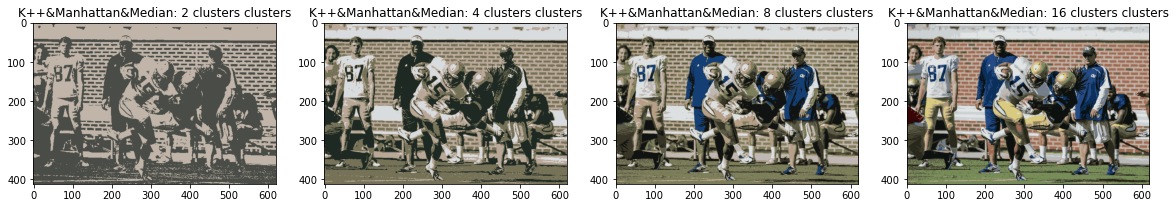

In [74]:
title='K++&Manhattan&Median'
fig,axes=plt.subplots(1,4,figsize=(20,10),sharex=True)
for col,cluster in zip(range(4),kmedian_results_ft_man):
    values=kmedian_results_ft_man[cluster]
    img_disp=convertImage(values[0],values[1],originalData.shape)
    axes[col].imshow(img_disp.astype("uint8"))
    axes[col].set_title(title+': {} clusters'.format(cluster))

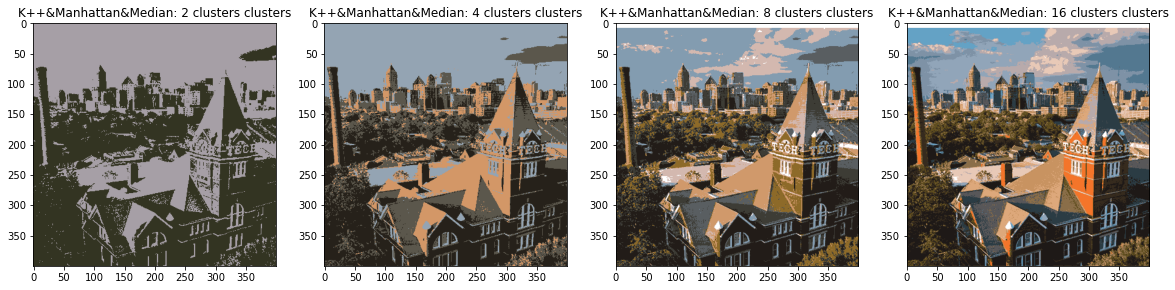

In [72]:
title='K++&Manhattan&Median'
fig,axes=plt.subplots(1,4,figsize=(20,10),sharex=True)
for col,cluster in zip(range(4),kmedian_results_gt_man):
    values=kmedian_results_gt_man[cluster]
    img_disp=convertImage(values[0],values[1],originalData_gt.shape)
    axes[col].imshow(img_disp.astype("uint8"))
    axes[col].set_title(title+': {} clusters'.format(cluster))

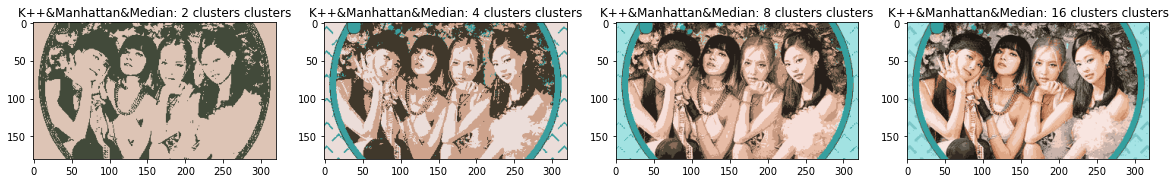

In [73]:
title='K++&Manhattan&Median'
fig,axes=plt.subplots(1,4,figsize=(20,10),sharex=True)
for col,cluster in zip(range(4),kmedian_results_bp):
    values=kmedian_results_bp_man[cluster]
    img_disp=convertImage(values[0],values[1],originalData_bp.shape)
    axes[col].imshow(img_disp.astype("uint8"))
    axes[col].set_title(title+': {} clusters'.format(cluster))

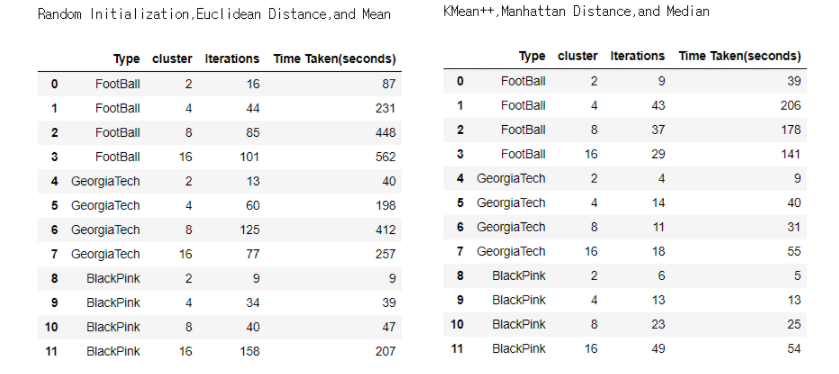

## <span style="color:green"> B) Analysis </span>

Two approaches have doen excellence jobs in classfication of colors and it is quite reasonable to assert that clustering results are almost same.But again the k-median is superior to K-mean in terms of the time taken for convergence and iteration numbers. There are many resons for acheiving the high level of statifying results,one of which is closely associated with median . Since median is by nature robust to the extreme values,outliers, impementing variations of the k-median method shoudl reduce the minimal shifts led by the presence of outliers. Givne the problems we are trying to solve,  the implementation of k-median must be shaped to handle the type of measurements. In our case, we need to take Manhattan distance as we see the results on the table. 

# 2 Spectral clustering and discover football colleague [40 points +2 bonus]


### 1. (10 points) 

Write down the graph Laplacian matrix and find the eigenvectors associated with the zero eigenvalue. Explain how do you find out the number of disconnected clusters in graph and identify these disconnected clusters using these eigenvectors




## <span style="color:green">Answer </span>


First,we need to compute the Laplicaian matrix,L of the input graph G. L can be shown as follows.
$
\\
$


<center>$L= \begin{pmatrix}
\ 1&-1&-1&0&0
\\-1&1&-1&0&0
\\-1&-1&1&0&0
\\0&0&0&1&-1
\\0&0&0&-1&1
\end{pmatrix}
$</center>


Second, find all the eigen vectors whose eigen values are zero.
 
<center>$LV_{i}=\begin{pmatrix}0 \\0 \\0 \\0 \\0 \end{pmatrix}$</center> 


Third, we can see that the number of eigenve vector sastifying the given condition is only one.

<center>$V_1=\begin{pmatrix}
   \\0
   \\0 
   \\0
   \\1
   \\1
    \end{pmatrix}$

</center>


Lastly, we need to put the computed eigenvectors into a matrix, but in our case, we only have one satisfying the pre-condition. since the vector itself contain information on cluster arrangement, we now use various clustering algorithm such as K-means to find the clusters. But in our case, by going through the value of each row, we can easily see that our graph  can be grouped into two clusters where <b>_each group shares the same feature vector._</b>


# Question 2 - 5

Now consider the football league example in the “spectral clustering” lecture. Use the data provided
there (in demo, play graph.txt, nodes.csv and edges.csv) for this question. Implement the spectral clustering
algorithm yourself (you can borrow the idea from demo code, in particular, regarding importing data, read
data etc.)


## 2. (10 points) 

For the graph Laplacian matrix and perform eigedecomposition on it. Plot the eigenvalues
(ranked from the largest to the smallest), and based on the plot explain approximately how many
clusters you believe there are and why.

## <span style="color:green">code</span>

In [2]:
import os
import numpy as np
from os.path import abspath,exists
from scipy import sparse
from matplotlib import pyplot as plt
import pandas as pd

In [13]:
def import_graph():
    directory = os.getcwd()
    f_path=directory+'\\'+'play_graph.txt' 
    if exists(f_path):
        with open(f_path) as graph_file:
            lines = [line.split() for line in graph_file]
    return np.array(lines).astype(int)

def read_team_name():
    # read inverse_teams.txt file
    directory = os.getcwd()
    f_path =directory+'\\'+"inverse_teams.txt"
    idx2name = []
    if exists(f_path):
        with open(f_path) as fid:
            for line in fid.readlines():
                name = line.split("\t", 1)[1]
                idx2name.append(name[:-1])
    return idx2name


class SpectralClustering():
    def __init__(self,graph,v,x,k):
        self.graph=graph
        self.v=v
        self.x=x
        self.k=k
    
    
    @classmethod
    def eigenDecomp(cls,graph,k):
        n=321
        i = graph[:, 0]-1
        j = graph[:, 1]-1
        v = np.ones((graph.shape[0], 1)).flatten()

        A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
        A = (A + np.transpose(A))/2
        A = sparse.csc_matrix.todense(A) # ## convert to dense matrix

        D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
        L = D @ A @ D
        L = np.array(L) # ## covert to array

        x, v,x_t = np.linalg.svd(L)
        
        x = x[:, 0:k].real
        
        idx_sorted = np.argsort(v) # the index of eigenvalue sorted acsending

        x = x[:, idx_sorted[-k:]] # select the k largest eigenvectors

        x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)
        return cls(graph,v,x,k)
    
    def clustering(self):
        labels=KMean(self.x,self.k).predict(verbose=False)
        return labels
    
    def getMinMax(self):
        labels=self.clustering()
        counter=Counter(labels)
        return self.k,counter.most_common(1)[0][1],counter.most_common()[-1][1]
    
    def showCluster(self):
        idx2name=read_team_name()
        c_idx=self.clustering()
        result=defaultdict(list)
        for i in range(self.k):
            idx=[index for index,t in enumerate(c_idx) if t==i]
            cluster='Cluster {}'.format(i)
            for index in idx:
                result[cluster].append(idx2name[index])
        return result
        
        

In [14]:
graph=import_graph()
sc=SpectralClustering.eigenDecomp(graph,321)
val=sc.v

Text(0, 0.5, 'Egienvalue')

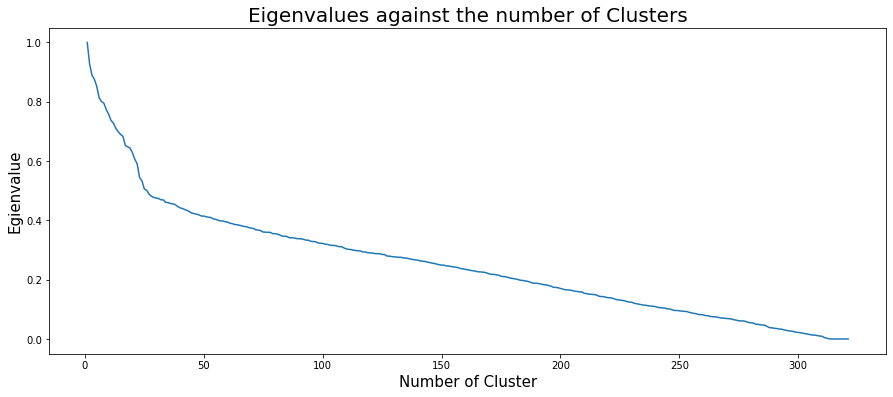

In [15]:
fig,ax=plt.subplots(figsize=(15,6))
ax.plot(np.arange(1,val.shape[0]+1),val)
ax.set_title("Eigenvalues against the number of Clusters",size=20)
plt.xlabel('Number of Cluster',size=15)
plt.ylabel('Egienvalue',size=15)

## <span style="color:green">Answer </span>


Eigen values are very often used to find the optimal number of K since most stable clustering is genverally achieved by the value k that maxmizes the difference between eigen value of current K and that of previous K.Therefore, we need choose the K corresponding to the maximum drop-off. Therefore, reflecting this fact, our optimal clusters should be around <b>25</b>.



## 3. (15 points) 

Now perform spectral clustering, using k = 5, k = 7, k = 10, and your choice of k (based
on your answer in Part (2). Report the size of the largest cluster and the smallest cluster based on
your result for each k. Report the results for k = 10 by listing the teams and which cluster they belong
to (you can either include a table in your solution, or upload a file or spreadsheet that include your
result).

## <span style="color:green">Answer </span>

In [18]:
graph=import_graph()
minMax=list()

for k in [5,7,10,25]:
    minMax.append(SpectralClustering.eigenDecomp(graph,k).getMinMax())
    
print("Table for the size of the largest and smallest cluster")
pd.DataFrame(minMax,columns=['Cluster Size','Largest','Smallest'])



C:\Users\sd4be\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sd4be\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Table for the size of the largest and smallest cluster


,Cluster Size,Largest,Smallest
0,5,106,36
1,7,104,26
2,10,58,15
3,25,321,321


In [21]:
data=SpectralClustering.eigenDecomp(graph,10).showCluster()

#create json file for the list of teams for each cluster
with open('cluster_team.json','w') as json_file:
    json.dump(data,json_file,indent=4)

###  4. (5 points) 

Now run the algorithm a few times for k = 10. You may notice the results are slightly
different - please explain why. Also check which clusters that “Georgia Tech”, “Georgia State”, and
“Georgia” (UGA) are in. Are they always in the same cluster or not - please explain your reasoning.


## <span style="color:green">Answer </span>

Partitioning the datasets into specific groups depends on the physical distance between nodes. No matter how many times we run our algorithm for clustering,  teams with closer proximity to each other than others always stick together. For example, colleges belonging to Ivey League belong to the same group because of physical proximity in the location.  This mechanism still applies to Georgia, Georgia Tech, and Georgia State since they are all located in the same state. But some nodes whose distance is somehow contiguous to more than one neighboring state should be assigned to a different cluster every time we run the algorithm. 



###  5. (5 points) (Bonus, 2 points.) 

Please report what else you can discover from this data analysis and results. Try to be creative.



## <span style="color:green">Analysis </span>


Depending on the number  of college teams in the eighboring states(between states) and that of local teams in the same states(witin states),allocation  will vary especailly across clusters. Compared to  in the East, the number of teams in the West are relatively small and are distant from one another,thereby allowing for quite an irregular arrangement of teams every time we implement the algorithm. Even though it is infrequent and rare, I have witnessed that teams less than 3 are assigned to one cluster and found that too small arrangement to clusters mostly usually comes from west region. On the other hnad,the change in members when clustering groups  was not as dramatic as we have seen in the west in that the colleges in the region are actively participating in the league and thier numbers within the state are uncomparably higher. 